<a href="https://colab.research.google.com/github/Ruchika810/Customer_Segmentation/blob/main/Customer_Segmentation_and_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Setup and Importing Libraries


In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score


Saving Mall_Customers.csv to Mall_Customers (1).csv


#Upload and Load the Dataset


In [ ]:
# Upload file from local system
from google.colab import files
uploaded = files.upload()

In [ ]:
# Load the dataset
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#Exploration and Cleaning


In [ ]:
# Check structure
df.info()

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Check for duplicates
print("\nDuplicates:", df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB

Missing Values:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Duplicates: 0


In [ ]:
# Rename columns (optional)
df.columns = ['CustomerID', 'Gender', 'Age', 'AnnualIncome', 'SpendingScore']

#Exploratory Data Analysis

##Summary Statistics


In [ ]:
# Summary statistics for numerical columns
df.describe()

,CustomerID,Age,AnnualIncome,SpendingScore
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


##Gender Distribution

/tmp/ipython-input-8-1449052914.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Gender', palette='Set2')


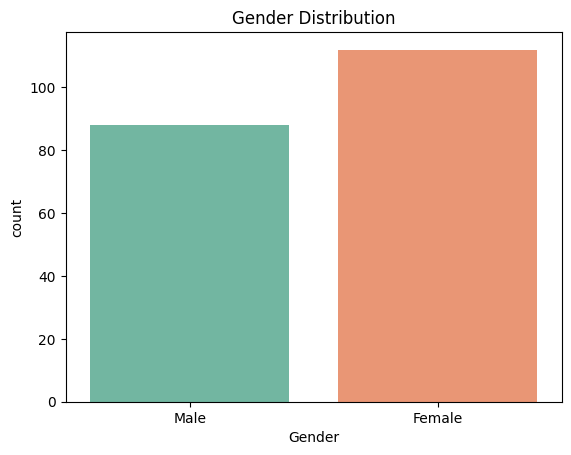

In [ ]:
# Countplot for Gender
sns.countplot(data=df, x='Gender', palette='Set2')
plt.title("Gender Distribution")
plt.show()

##Age Distribution

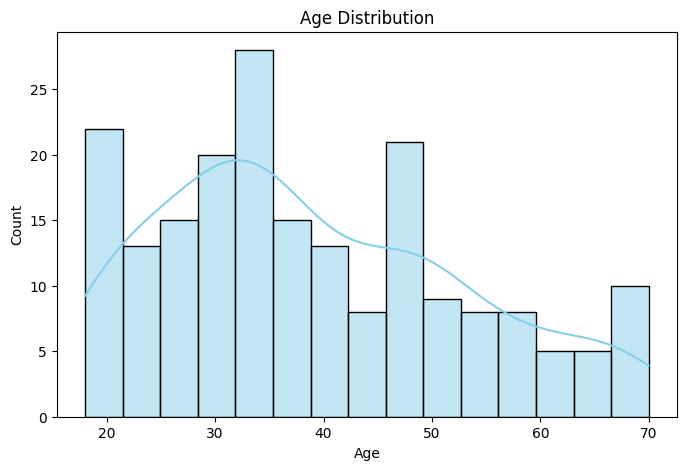

In [ ]:
# Age distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=15, kde=True, color='skyblue')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

##Annual Income Distribution

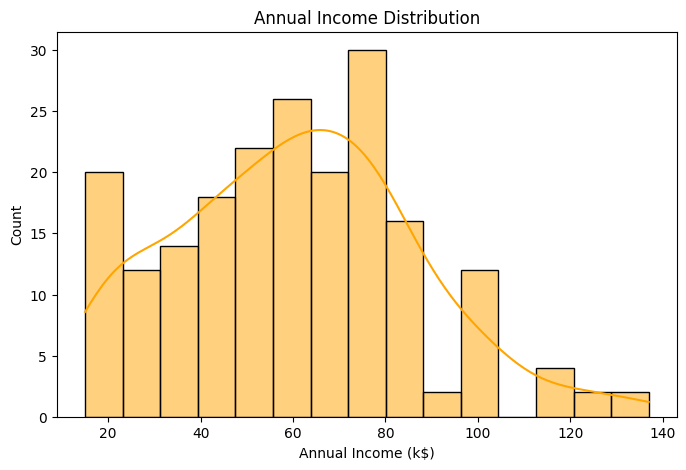

In [ ]:
# Income distribution
plt.figure(figsize=(8,5))
sns.histplot(df['AnnualIncome'], bins=15, kde=True, color='orange')
plt.title("Annual Income Distribution")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Count")
plt.show()

##Spending score distribution


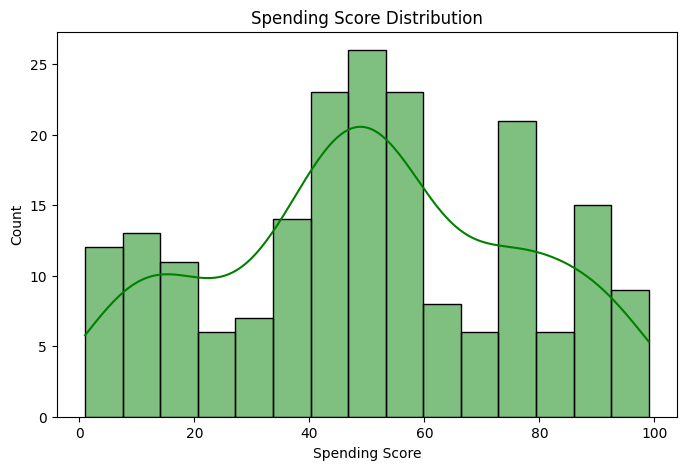

In [ ]:
# Spending score distribution
plt.figure(figsize=(8,5))
sns.histplot(df['SpendingScore'], bins=15, kde=True, color='green')
plt.title("Spending Score Distribution")
plt.xlabel("Spending Score")
plt.ylabel("Count")
plt.show()

##Relationship Between Income and Spending Score

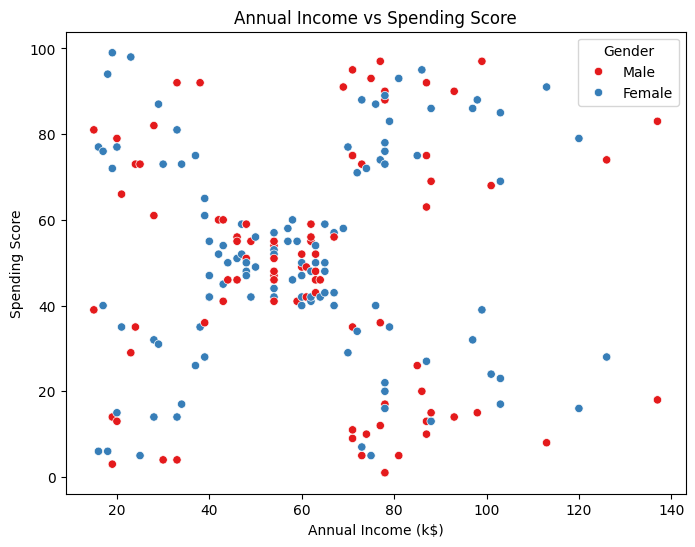

In [ ]:
# Scatter plot: Income vs Spending Score
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='AnnualIncome', y='SpendingScore', hue='Gender', palette='Set1')
plt.title("Annual Income vs Spending Score")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score")
plt.show()

##Correlation Matrix

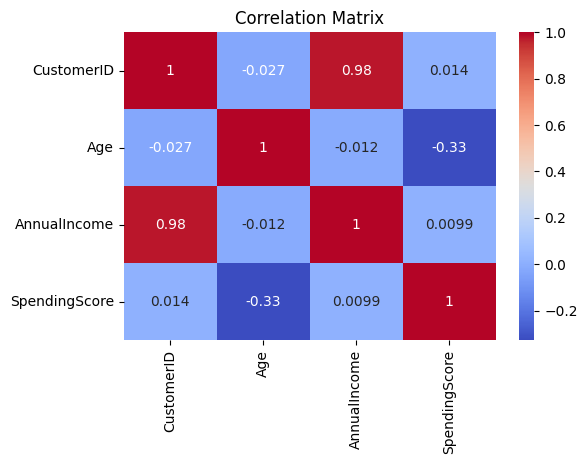

In [ ]:
# Correlation heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

#Feature Selection and Scaling


In [ ]:
X = df[['AnnualIncome', 'SpendingScore']]


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

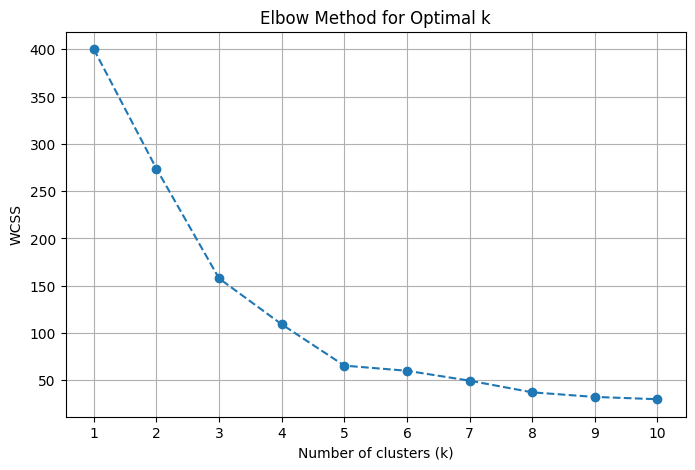

In [ ]:
wcss = []  # Within-cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("WCSS")
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()



**The “elbow point” where WCSS stops dropping significantly.

Typically, the elbow is around k = 3 to 5 for this dataset.**



#K-means Clustering

In [ ]:
#Fit K-Means with k=5
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)

# Add cluster labels to the original dataframe
df['Cluster'] = kmeans.labels_

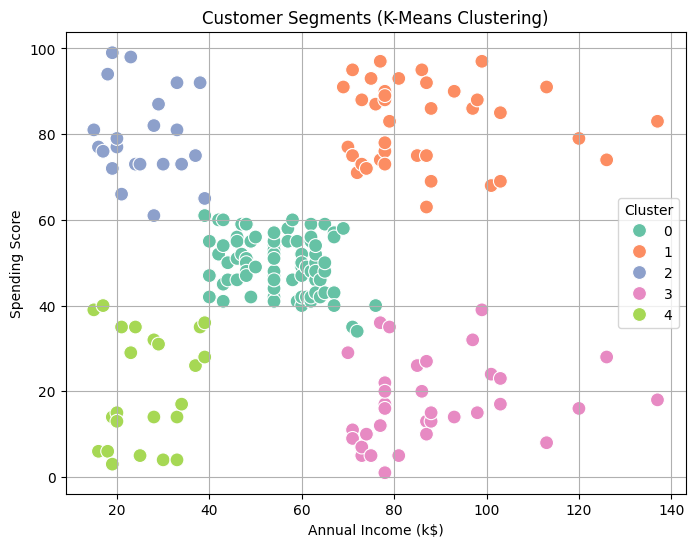

In [ ]:
# Visualize clusters
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=df['AnnualIncome'],
    y=df['SpendingScore'],
    hue=df['Cluster'],
    palette='Set2',
    s=100
)
plt.title("Customer Segments (K-Means Clustering)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

In [ ]:
# Summary of each cluster
df.groupby('Cluster')[['Age', 'AnnualIncome', 'SpendingScore']].mean().round(1)

,Age,AnnualIncome,SpendingScore
Cluster,,,
0,42.7,55.3,49.5
1,32.7,86.5,82.1
2,25.3,25.7,79.4
3,41.1,88.2,17.1
4,45.2,26.3,20.9


In [ ]:
df['Cluster'].value_counts().sort_index()

,count
Cluster,
0,81
1,39
2,22
3,35
4,23


#Predictive Modeling- Spending Score

In [ ]:
# Convert 'Gender' to numeric
df_encoded = df.copy()
df_encoded['Gender'] = df_encoded['Gender'].map({'Male': 0, 'Female': 1})

In [ ]:
# Features and target
features = ['Gender', 'Age', 'AnnualIncome']
target = 'SpendingScore'

X = df_encoded[features]
y = df_encoded[target]

In [ ]:
#Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
#Train Decision Tree Regressor
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
# Predictions
y_pred = model.predict(X_test)

# Evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Root Mean Squared Error (RMSE):", round(rmse, 2))
print("R-squared Score (R²):", round(r2, 2))

Root Mean Squared Error (RMSE): 27.67
R-squared Score (R²): -0.55


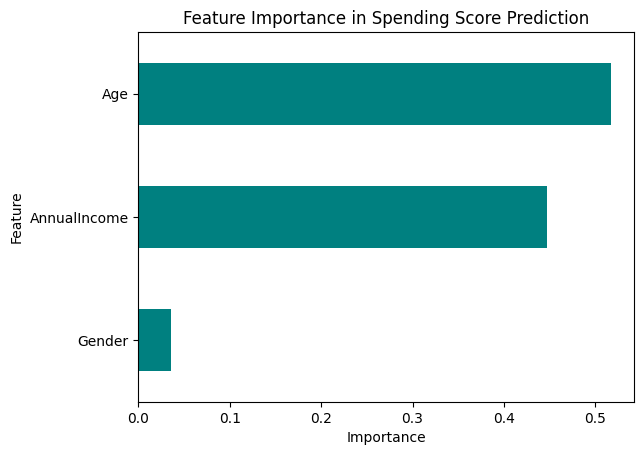

In [ ]:
# Visualize feature importances
feature_importance = pd.Series(model.feature_importances_, index=features)
feature_importance.sort_values().plot(kind='barh', color='teal')
plt.title("Feature Importance in Spending Score Prediction")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

#Conclusion


Cluster and Description:-

0 -  	Low income, low spending — value-conscious or inactive segment

1	  -  High income, high spending — premium customers, high CLV

2	- Low income, high spending — impulse buyers, good for budget deals

3 -	Mid income, mid spending — steady shoppers, can be upsold

4	- High income, low spending — cautious or unengaged high-potential

** Prediction Insights (Decision Tree)**

1)Top predictor of spending: Likely Annual Income, followed by Age or Gender

2)RMSE gives an idea of average error in predicting spending score — if it’s low (e.g., < 10), the model is decent

3)Can be used to:

Predict how a new customer might spend

Personalize offers at the time of onboarding

**Marketing Recommendations**

Segment & Strategy


High Spend + High Income - Loyalty programs, early access to premium

Low Spend + High Income	- Targeted re-engagement, email marketing

Low Spend + Low Income	- Budget deals, gamified offers

Mid Segment	- Upsell through combo discounts

Impulse Buyers -	Flash sales, time-limited deals



Future Enhancements:-

Include product-level transaction data for RFM analysis

Add time-series data to forecast revenue

A/B test model-driven marketing strategies